# Dimensionality reduction

This notebook serves the purporse of practicing and refining my knowledge on dimensionality reduciton.

The dimensionality reduction algorithms that I will likely use most often are Principle component Analysis and Locally Linear Embeddings. On a high level, locally linear embeddings perform well when the relationship between features cannot be adequately explained in a linear fashion, it is thus useful for nonlinear datasts.
    

In [ ]:
from sklearn.datasets import fetch_openml
import numpy as np

mnist = fetch_openml("mnist_784", as_frame=False)
X: np.ndarray = mnist.data
y: np.ndarray = mnist.target

X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from time import perf_counter


rnf_clf = RandomForestClassifier(random_state=42)
t_0 = perf_counter()
rnf_clf.fit(X_train, y_train)
t_1 = perf_counter()
print(f"Training time base: {t_1 - t_0}")


# Just use a normal PCA as a baseline for the measurement
rnf_clf_2 = RandomForestClassifier(random_state=42)
# Automatically calculate cumsum as to reach at least 0.95 explained variance in reduction
pca_trans = PCA(n_components=0.95, random_state=42)
t_0 = perf_counter()
X_reduced = pca_trans.fit_transform(X_train)
t_1 = perf_counter()
reduction_time = t_1 - t_0
print(f"Reduction Time: {reduction_time}")
t_0 = perf_counter()
rnf_clf_2.fit(X_reduced, y_train)
t_1 = perf_counter()
print(f"Training time reduced: {t_1 - t_0}")
print(f"Total time reduction+train: {t_1 - t_0 + reduction_time}")


Training time base: 72.16838250000728
Reduction Time: 3.048665299982531
Training time reduced: 270.7273542000039
Total time reduction+train: 273.77601949998643


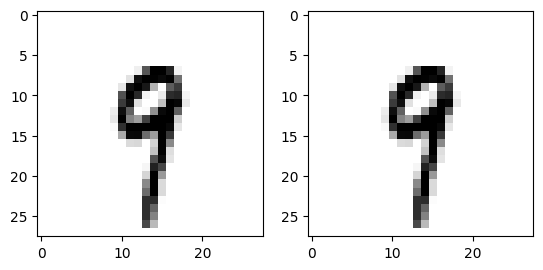

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import colormaps

# Let us visualize a randomly chosen number to see how exactly dimenstionality reduction compresses our images.
fig, axs = plt.subplots(
    1,
    2,
)
for i in range(2):
    axs[i].imshow(X_train[600].reshape((28, 28)), cmap=colormaps["binary"])


Base Accuracy: 0.9705
Base Accuracy: 0.9488


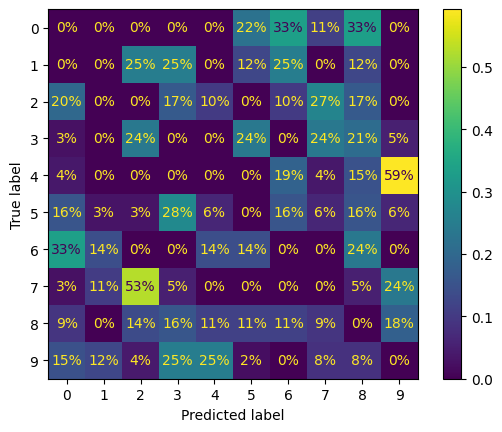

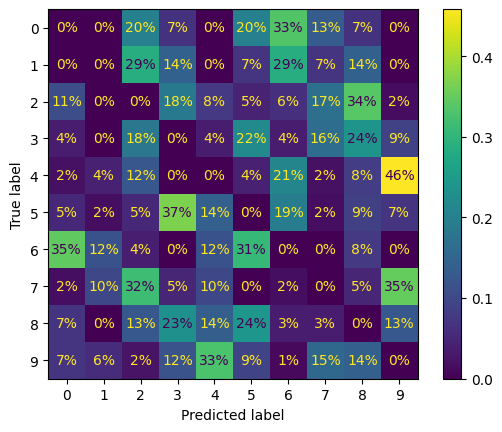

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score

y_pred_base = rnf_clf.predict(X_test)
sample_weight = y_pred_base != y_test
ConfusionMatrixDisplay.from_predictions(
    y_true=y_test,
    y_pred=y_pred_base,
    normalize="true",
    values_format=".0%",
    sample_weight=sample_weight,
)
print(f"Base Accuracy: {accuracy_score(y_true=y_test, y_pred=y_pred_base)}")
# Need to reduce dimensionality first, EVs are already calculated, so this is a matrix multiplication
X_test_red = pca_trans.transform(X_test)
y_pred_red = rnf_clf_2.predict(X_test_red)
sample_weight = y_pred_red != y_test
ConfusionMatrixDisplay.from_predictions(
    y_true=y_test,
    y_pred=y_pred_red,
    normalize="true",
    values_format=".0%",
    sample_weight=sample_weight,
)
print(f"Base Accuracy: {accuracy_score(y_true=y_test, y_pred=y_pred_red)}")


We can see that we had slightly worse performance. To be honest the training also took pretty long, I wonder why that is, let us look at the dimensionality of the reduced dataset

In [8]:
pca_trans.n_components_

np.int64(154)

We reduced our data to 154 dimensions from 784 originally, so the reason that we didn't see great performance gains is probably due to cpu scheduling, I was doing otherstuff while running the test, and perf_counters does count time in sleep and other time not in the CPU, so this is expected. As expected and visible in the accuracy score, our predictions did not get any more accurate, the confusion matrix shows that for some classes the misclassification into certain classes decreased, e.g. 4 as 9 and for others it increased e.g. 7 as 2. Overall, the point behind dimensionality reduction is not to increasy accuracy, but instead to make the problem more tractable.

(5000, 2)


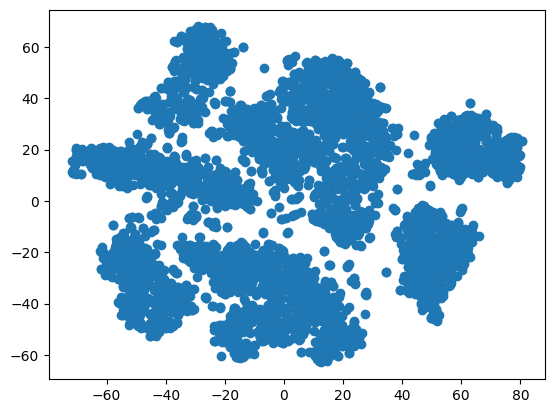

In [ ]:
from sklearn.manifold import TSNE

# t-Distributed stochastic neighbour embeddign is widely utilised for visualization
tsne = TSNE(random_state=42)
X_new = tsne.fit_transform(X=X_train[:5000])
fig, ax = plt.subplots(1, 1)
print(X_new.shape)
ax.scatter(X_new[:, 0], X_new[:, 1])
plt.show()


In [25]:
list(colormaps)

['magma',
 'inferno',
 'plasma',
 'viridis',
 'cividis',
 'twilight',
 'twilight_shifted',
 'turbo',
 'berlin',
 'managua',
 'vanimo',
 'Blues',
 'BrBG',
 'BuGn',
 'BuPu',
 'CMRmap',
 'GnBu',
 'Greens',
 'Greys',
 'OrRd',
 'Oranges',
 'PRGn',
 'PiYG',
 'PuBu',
 'PuBuGn',
 'PuOr',
 'PuRd',
 'Purples',
 'RdBu',
 'RdGy',
 'RdPu',
 'RdYlBu',
 'RdYlGn',
 'Reds',
 'Spectral',
 'Wistia',
 'YlGn',
 'YlGnBu',
 'YlOrBr',
 'YlOrRd',
 'afmhot',
 'autumn',
 'binary',
 'bone',
 'brg',
 'bwr',
 'cool',
 'coolwarm',
 'copper',
 'cubehelix',
 'flag',
 'gist_earth',
 'gist_gray',
 'gist_heat',
 'gist_ncar',
 'gist_rainbow',
 'gist_stern',
 'gist_yarg',
 'gnuplot',
 'gnuplot2',
 'gray',
 'hot',
 'hsv',
 'jet',
 'nipy_spectral',
 'ocean',
 'pink',
 'prism',
 'rainbow',
 'seismic',
 'spring',
 'summer',
 'terrain',
 'winter',
 'Accent',
 'Dark2',
 'Paired',
 'Pastel1',
 'Pastel2',
 'Set1',
 'Set2',
 'Set3',
 'tab10',
 'tab20',
 'tab20b',
 'tab20c',
 'grey',
 'gist_grey',
 'gist_yerg',
 'Grays',
 'magma_r',

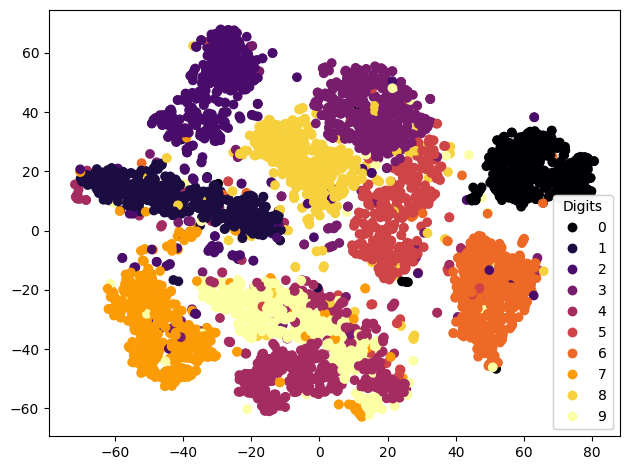

In [ ]:
fig, ax = plt.subplots()
sc = ax.scatter(
    X_new[:, 0].reshape(-1, 1),
    X_new[:, 1].reshape(-1, 1),
    c=y_train[:5000].reshape(-1, 1),
    cmap=colormaps["inferno"],
)
legend1 = ax.legend(*sc.legend_elements(), title="Digits")
ax.add_artist(legend1)
fig.tight_layout()
plt.show()


Oh wow, this is really amazing, the clusters are particularly visible. Very nice. Although we can also see overlapping clusters for the number 4 and 9, just like we saw in our confusion matric, although the confusion matrix can be a bit misleading as we normalized it per row, so rows are not comparable with each other. But let us not fall into the trap of using k-means on TSNE transformed data as it abandons scale as to give us useful visualization, so if we want to cluster we should cluster in the original or PCA space.
The relatively clean clusterign that we see here also explains why the KNN worked so well even as well as other advanced methods like stackin with such little effort. So we certainly can use TSNE to somewhat inform our model choices.  